In [1]:
import json
from pprint import pprint
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# set the default plot size
pylab.rcParams['figure.figsize'] = (12, 6)

In [4]:
# load json data
with open('mlb_top_100.json') as json_data:
    data = json.load(json_data)

In [5]:
# how many records are there?
len(data)

99

In [6]:
# look at the dictionary keys in the first record
data[0].keys()

dict_keys(['team_file_code', 'signed', 'preseason100', 'twitter', 'weight', 'drafted', 'positions', 'player_first_name', 'height', 'thrw', 'eta', 'school', 'year', 'birthdate', 'player_last_name', 'content', 'player_id', 'bats', 'preseason20'])

In [7]:
# inspect one record
pprint(data[0])

{'bats': '',
 'birthdate': '',
 'content': {'default': '<b>Scouting grades:</b> Fastball: 65 | Curveball: 60 '
                        '| Changeup: 50 | Control: 50 | Overall: 55\n'
                        '\n'
                        '<p>The son of a former NBA player, Manning was a '
                        'two-sport star who could have gone on to play both '
                        'sports at Loyola-Marymount, and when the Tigers went '
                        'slightly above pick value to sign him away from that '
                        'commitment, they knew Manning might be a bit of a '
                        'project. The Tigers have proceeded with '
                        'understandable caution, holding the 6-foot-6 '
                        'right-hander back in extended Spring Training to '
                        'start his first full year of pro ball. He eventually '
                        'pitched his way from short-season Connecticut to '
                        'fu

In [8]:
# iterate over data and clean up the content
for line in data:
    
    # remove newline delimiter
    bio = line['content']['default'].replace('\n', '')
    
    # conform scouting grades
    bio = bio.replace('<b>Scouting grades:</b>', 'Scouting Grades')
    bio = bio.replace('<b>Scouting grades</b>:', 'Scouting Grades')
    bio = bio.replace('<b>Scouting Grades:</b>', 'Scouting Grades')
    
    # split the bio on paragraph tag
    bio = bio.split('<p>')
    
    # create a new key to hold bio
    line['bio'] = bio

In [9]:
# inspect the new bio 
pprint(data[0]['bio'])

['Scouting Grades Fastball: 65 | Curveball: 60 | Changeup: 50 | Control: 50 | '
 'Overall: 55',
 'The son of a former NBA player, Manning was a two-sport star who could have '
 'gone on to play both sports at Loyola-Marymount, and when the Tigers went '
 'slightly above pick value to sign him away from that commitment, they knew '
 'Manning might be a bit of a project. The Tigers have proceeded with '
 'understandable caution, holding the 6-foot-6 right-hander back in extended '
 'Spring Training to start his first full year of pro ball. He eventually '
 'pitched his way from short-season Connecticut to full-season West Michigan, '
 'capping his season off with a 10-strikeout performance in the Midwest League '
 'playoffs.',
 'Manning has as much, if not more, upside than any pitcher in the Tigers '
 'system, but he also might have the farthest to go to reach it. As he works '
 "to refine his delivery, his command and velocity has fluctuated. When he's "
 "in sync, he's easily in the l

In [10]:
# iterate over data and extract scouting grades into new keys
for line in data:
    
    # create an empty container to hold non-scouting grades
    bio = []
    
    # iterate over the bio key specifically
    for item in line['bio']:
    
        # get the line that starts with scouting grades
        if item.startswith('Scouting Grades'):

            # remove the beginning of the sententce
            grades = item.replace('Scouting Grades', '')

            # split in seperate metrics
            metrics = grades.split('|')

            # iterate over the metrics
            for i in metrics:

                # seperate the metric from the value
                value = i.split(':')

                # add metrics and values as new keys/values
                line[value[0].strip()] = value[1].strip()
                
        # if it's not a scouting grade...
        else:
            
            # add to bio
            bio.append(item)
            
    # join the bio text into one string
    line['bio'] = ''.join(bio)

In [11]:
# inspect one record
pprint(data[0])

{'Changeup': '50',
 'Control': '50',
 'Curveball': '60',
 'Fastball': '65',
 'Overall': '55',
 'bats': '',
 'bio': 'The son of a former NBA player, Manning was a two-sport star who '
        'could have gone on to play both sports at Loyola-Marymount, and when '
        'the Tigers went slightly above pick value to sign him away from that '
        'commitment, they knew Manning might be a bit of a project. The Tigers '
        'have proceeded with understandable caution, holding the 6-foot-6 '
        'right-hander back in extended Spring Training to start his first full '
        'year of pro ball. He eventually pitched his way from short-season '
        'Connecticut to full-season West Michigan, capping his season off with '
        'a 10-strikeout performance in the Midwest League playoffs.Manning has '
        'as much, if not more, upside than any pitcher in the Tigers system, '
        'but he also might have the farthest to go to reach it. As he works to '
        'refine his 

In [12]:
# iterate over the data and remove content key now that we have extracted what we want
for line in data:
    del line['content']

In [13]:
# inspect one record
pprint(data[0])

{'Changeup': '50',
 'Control': '50',
 'Curveball': '60',
 'Fastball': '65',
 'Overall': '55',
 'bats': '',
 'bio': 'The son of a former NBA player, Manning was a two-sport star who '
        'could have gone on to play both sports at Loyola-Marymount, and when '
        'the Tigers went slightly above pick value to sign him away from that '
        'commitment, they knew Manning might be a bit of a project. The Tigers '
        'have proceeded with understandable caution, holding the 6-foot-6 '
        'right-hander back in extended Spring Training to start his first full '
        'year of pro ball. He eventually pitched his way from short-season '
        'Connecticut to full-season West Michigan, capping his season off with '
        'a 10-strikeout performance in the Midwest League playoffs.Manning has '
        'as much, if not more, upside than any pitcher in the Tigers system, '
        'but he also might have the farthest to go to reach it. As he works to '
        'refine his 

In [14]:
# iterate over data convert values to integers where possible
for line in data:
    for key in line:
        try:
            line[key] = int(line[key])
        except:
            pass

In [15]:
# load data into a DataFrame
df = pd.DataFrame(data)

In [16]:
# convert column names to lowercase
df.columns = df.columns.str.lower()

In [17]:
# inspect the data types
df.dtypes

arm                  float64
changeup             float64
control              float64
curve                float64
curveball            float64
cutter               float64
fastball             float64
field                float64
hit                  float64
overall              float64
power                float64
run                  float64
screwball            float64
slider               float64
bats                  object
bio                   object
birthdate             object
drafted               object
eta                    int64
height                object
player_first_name     object
player_id              int64
player_last_name      object
positions             object
preseason100          object
preseason20           object
school                object
signed                object
team_file_code        object
thrw                  object
twitter               object
weight                object
year                  object
dtype: object

In [18]:
# inspect the DataFrame
df.head()

,arm,changeup,control,curve,curveball,cutter,fastball,field,hit,overall,...,positions,preseason100,preseason20,school,signed,team_file_code,thrw,twitter,weight,year
0,NaN,50.0,50.0,NaN,60.0,NaN,65.0,NaN,NaN,55.0,...,RHP,,,,,DET,,MattManning19,,
1,50.0,NaN,NaN,NaN,NaN,NaN,NaN,55.0,55.0,55.0,...,OF,,,,,PHI,,adamhaseley7,,
2,70.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,60.0,65.0,...,OF,6,1,,"July 2, 2013 - WSH",WAS,,,,
3,50.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,60.0,65.0,...,OF,,,,"Aug. 1, 2013 - CHC",CWS,,Lamantha21,,
4,NaN,60.0,55.0,NaN,50.0,NaN,55.0,NaN,NaN,55.0,...,LHP,,,,,MIN,,TheSGonsalves,,


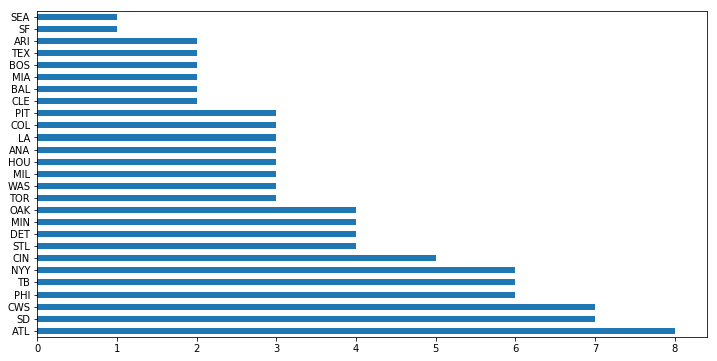

In [19]:
# plot the number of players per team
df['team_file_code'].value_counts().plot('barh')

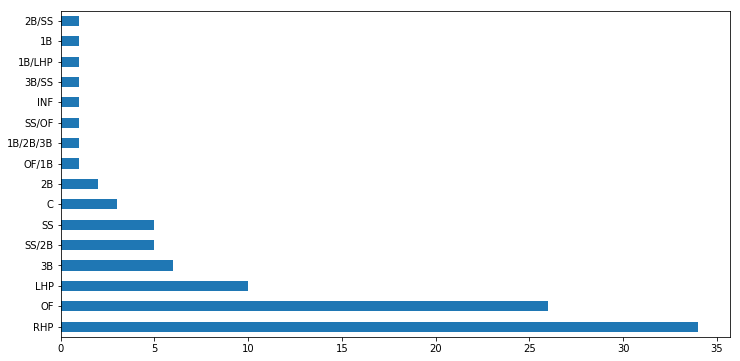

In [20]:
# count the number players by positions
df['positions'].value_counts().plot('barh')

[]

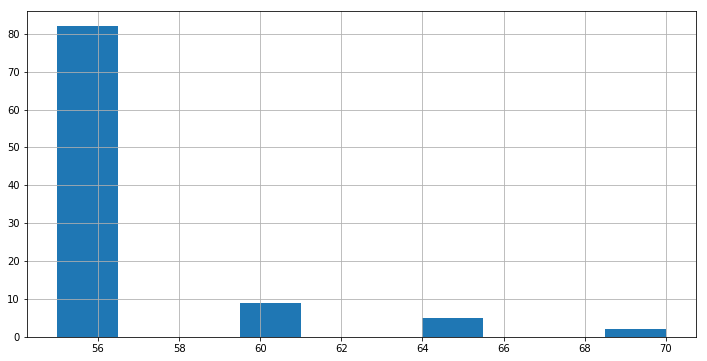

In [21]:
# calculate the average overall score
df['overall'].hist().plot()

In [22]:
# write the dataframe to CSV
df.to_csv("mlb_top_100.csv")